In [11]:
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import numpy as np
import random

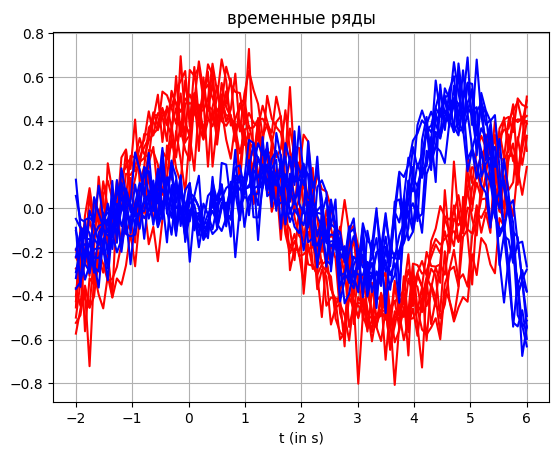

In [12]:
time_index = np.linspace(-2, 6, 100)

tseries_list = []
d = np.random.random(size=10)

N = 10
f0 = 0.3

rand = np.random.random(size=10)

# пульс с использованием гауссовой функции
for i in range(N):
    tseries_list.append(0.5 * np.sin(time_index + rand[i] + 0.5))
    noise1 = np.random.normal(0, 0.1, 100)
    tseries_list[i] = tseries_list[i] + noise1

# сигнал с экспоненциальным затуханием
for i in range(N):
    noise1 = np.random.normal(0, 0.1, 100)
    tseries_list.append((-0.1*time_index) * np.cos(2*np.pi*f0*time_index + d[i]) + noise1)

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-r')
for i in range(N, 2 * N):
    plt.plot(time_index, tseries_list[i], '-b')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()
plt.show()

In [13]:
# def generate_shapletes_candidate(ts_i, l):
#     shapletes = []
#     for i in range(len(ts_i) - l + 1):
#         shapletes.append(ts_i[i:i+l])
#     return shapletes
#
# def distance_shapletes(ts_i, l):
#     dist = []
#     for i in ts_i:
#         dist.append(euclidean(i, l))
#     return dist
#
# def evaluate_candidate_shapletes(subs, d_s):
#     return 0
#
# def discovery_shapletes(tseries_list, min = 3, max = 100, r = 200, quality = 0.05):
#     rShapletes = []
#     numC = 2
#     p = r / numC
#
#     for ts_i in tseries_list:
#         shapletes = []
#         for l in range(min, max + 1):
#             w_i_l = generate_shapletes_candidate(ts_i, l)
#             for subs in w_i_l:
#                 d_s = distance_shapletes(subs, w_i_l)
#                 quality = evaluate_candidate_shapletes(subs, d_s)
#                 shapletes.append({subs: quality})
#
#
#     return shapletes


def classLabels(T):
    class_labels = []
    for i in range(len(T)):
        if i < 10:
            class_labels.append(1)
        else:
            class_labels.append(2)
    return class_labels


def generateCandidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates


def findDistances(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances


def assessCandidate(S, DS):
    quality = np.mean(np.sqrt(DS))
    return quality


def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insertShapelet(result, shapelet)
    return result


def insertShapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result


def shapeletCachedSelection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    class_labels = classLabels(tseries_list)
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generateCandidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = findDistances(candidate, candidates)
                quality = assessCandidate(candidate, distances)
                shapelets.append((candidate, quality))
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [14]:
K_shapletes_tg = shapeletCachedSelection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_texp = shapeletCachedSelection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_tg)
print(K_shapletes_texp)

[(array([0.67105527, 0.53714471, 0.56382766, 0.50445296]), 1.0103007021337749), (array([0.48874865, 0.67105527, 0.53714471, 0.56382766]), 1.0057767837995135), (array([-0.46690938, -0.45226624, -0.61282639, -0.55888154]), 1.0028626737147133), (array([-0.61282639, -0.55888154, -0.4517061 , -0.47345296]), 1.001877478200042), (array([-0.45226624, -0.61282639, -0.55888154, -0.4517061 ]), 0.9999886131519189), (array([0.47733517, 0.48874865, 0.67105527, 0.53714471]), 0.9875478945478449), (array([-0.51876282, -0.54437507, -0.53036005, -0.4708717 ]), 0.9858115565970289), (array([-0.41535794, -0.631293  , -0.22751223, -0.52944961]), 0.9837119534564492), (array([-0.44793949, -0.51876282, -0.54437507, -0.53036005]), 0.983316737240788), (array([-0.4708717 , -0.46690938, -0.45226624, -0.61282639]), 0.9830400488852047), (array([-0.631293  , -0.22751223, -0.52944961, -0.40612901]), 0.9819393299273029), (array([0.50161741, 0.47733517, 0.48874865, 0.67105527]), 0.9800204360129596), (array([-0.54437507, 

In [16]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_tg + K_shapletes_texp

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]
    x.append(res)

    if i < len(K_shapletes_tg):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
y_train = []
y_test = []
print(shpletes_qual)

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    y_test.append(Y[indexes[i] - 1])

[(array([0.67105527, 0.53714471, 0.56382766, 0.50445296]), 1.0103007021337749), (array([0.48874865, 0.67105527, 0.53714471, 0.56382766]), 1.0057767837995135), (array([-0.46690938, -0.45226624, -0.61282639, -0.55888154]), 1.0028626737147133), (array([-0.61282639, -0.55888154, -0.4517061 , -0.47345296]), 1.001877478200042), (array([-0.45226624, -0.61282639, -0.55888154, -0.4517061 ]), 0.9999886131519189), (array([0.47733517, 0.48874865, 0.67105527, 0.53714471]), 0.9875478945478449), (array([-0.51876282, -0.54437507, -0.53036005, -0.4708717 ]), 0.9858115565970289), (array([-0.41535794, -0.631293  , -0.22751223, -0.52944961]), 0.9837119534564492), (array([-0.44793949, -0.51876282, -0.54437507, -0.53036005]), 0.983316737240788), (array([-0.4708717 , -0.46690938, -0.45226624, -0.61282639]), 0.9830400488852047), (array([-0.631293  , -0.22751223, -0.52944961, -0.40612901]), 0.9819393299273029), (array([0.50161741, 0.47733517, 0.48874865, 0.67105527]), 0.9800204360129596), (array([-0.54437507, 

In [18]:
from pyts.classification import TimeSeriesForest

clf = TimeSeriesForest()
clf.fit(X_train, y_train)

print("--- Классификатор TimeSeriesForest ---\n")
print(f"Accuracy = {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(np.array(X_test[i]).reshape(1, -1))[0]}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор TimeSeriesForest ---

Accuracy = 0.8333333333333334
Вектор вероятности принадлежности к классам [0.416 0.584]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.092 0.908]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.994 0.006]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.678 0.322]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.508 0.492]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.986 0.014]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.492 0.508]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.278 0.722]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.084 0.916]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.772 0.228]
Истинный класс для предсказаний 1

